# Moving householders analyze

In [1]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("ACSDT1Y2023.B25128-2025-03-11T090810.csv")

### Data info

In [2]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Label (Grouping)                45 non-null     object
 1   United States!!Estimate         45 non-null     object
 2   United States!!Margin of Error  45 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


,Label (Grouping),United States!!Estimate,United States!!Margin of Error
0,Total:,"131,332,360","±130,190"
1,Owner occupied:,"85,685,869","±259,497"
2,Householder 15 to 34 years:,"9,128,548","±82,458"
3,Moved in 2021 or later,"4,060,736","±48,616"
4,Moved in 2018 to 2020,"3,139,105","±35,649"


### Data refactoring and cleaning

In [3]:
data.columns = data.columns.str.replace(r'!!', ' ', regex=True)

data['United States Estimate'] = data['United States Estimate'].str.replace(',', '').astype(float)

data['United States Margin of Error'] = data['United States Margin of Error'].str.replace('±', '').str.replace(',','').astype(float)

### Now there is a strong need to identify the rows acting as category titles

In [4]:
category_mask = data['Label (Grouping)'].str.endswith(':')
# category_mask

In [5]:
# add a cattegory row to easily identify every row
data['Category'] = data['Label (Grouping)'].where(category_mask).ffill()
data['Category'] = data['Category'].str.replace(':', '', regex=False) #some cleaning

data.loc[category_mask, 'Label (Grouping)'] = 'Total'  # rename categories as Total for clarity

In [6]:
occ_cat_mask = data['Category'].str.contains('occupied', case=False, regex=False, na=False)
data['Occupation category'] = data['Category'].where(occ_cat_mask).ffill()
data.loc[occ_cat_mask, 'Category'] = 'Total'

In [76]:
data.set_index(['Occupation category', 'Category', 'Label (Grouping)'], inplace=True) # gamechanger !1!!@!@ (in appearance)
# inplace=True → modifies the DataFrame directly instead of returning a new one

In [77]:
# little index sorting
data.sort_index(inplace=True)

In [71]:
# reset indexes
data.reset_index(inplace=True)

In [10]:
# data.index.levels
data.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [20]:
# for occ_cat in data.index.get_level_values(2):
#     print(occ_cat)

### Plot section

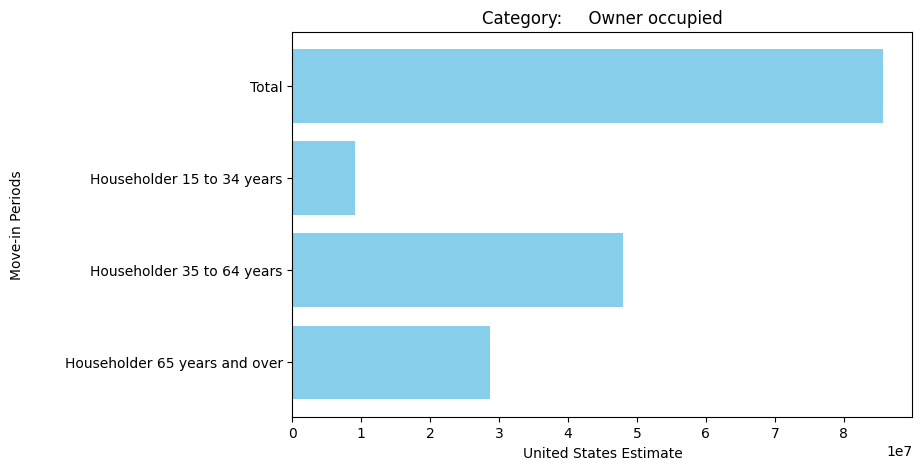

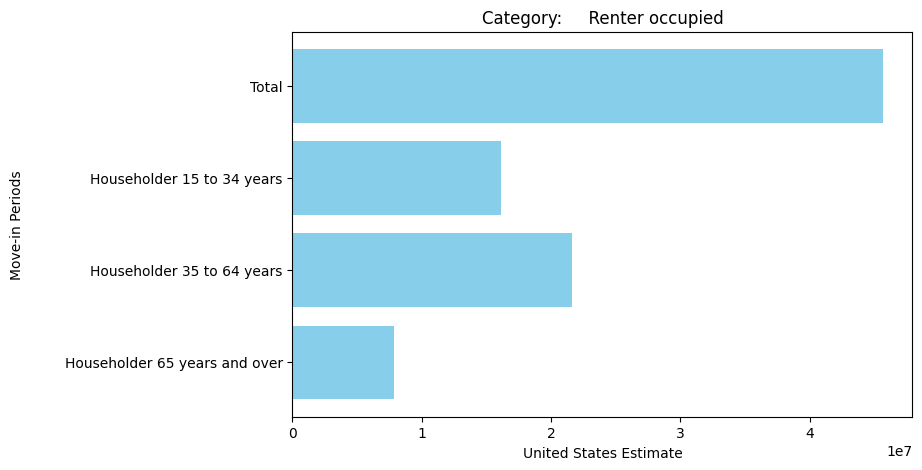

In [112]:
for category, group in data.groupby(level=0):
    plt.figure(figsize=(8, 5))
    
    labels = group.index.get_level_values(1)
    values = group.iloc[:, 0]
    
    plt.barh(labels, values, color='skyblue')
    plt.xlabel("United States Estimate")
    plt.ylabel("Move-in Periods")
    plt.title(f"Category: {category}")
    plt.gca().invert_yaxis() 
    
    plt.show()

### Number of movings in given periods

In [ ]:
#plots
#OLD
columns = [category for category,_ in data.groupby(level=1)]
# sum_years = pd.DataFrame(columns=columns)
# print(sum_years)

summed_data = data.groupby(level=[0, 1])['United States Estimate'].sum()
# print(summed_data)

householder_sums = data.groupby(level=['Occupation category', 'Category'])['United States Estimate'].sum()
# print(householder_sums)

merged_sums = data.groupby(level='Occupation category')['United States Estimate'].sum()
# print(merged_sums)

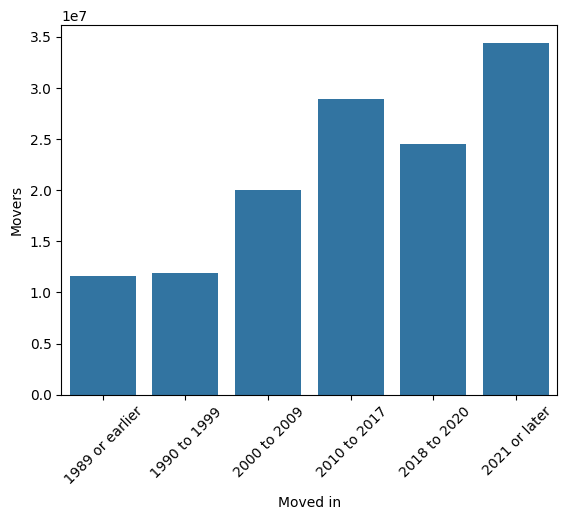

In [110]:
merged_householders = data.groupby(level='Label (Grouping)')['United States Estimate'].sum()
names = data.index.get_level_values('Label (Grouping)').unique()
del merged_householders['Total']
names = names.drop('Total')
names = names.str.strip()
names = names.str.replace('Moved in','',regex=True)
# print(len(names[0]))
# merged_householders = merged_householders.to_frame()

# print(names)
# print(merged_householders)
    
sns.barplot(data=merged_householders)
plt.xticks(rotation=45)
plt.xticks(ticks=range(len(names)), labels=names)
plt.xlabel("Moved in") 
plt.ylabel("Movers")
plt.show()

In [19]:
data

United States Estimate  \
Occupation category Category                              Label (Grouping)                                               
    Owner occupied  Total                                 Total                                             85685869.0   
                            Householder 15 to 34 years    Total                                              9128548.0   
                                                                      Moved in 1989 or earlier                  9107.0   
                                                                      Moved in 1990 to 1999                   118540.0   
                                                                      Moved in 2000 to 2009                   202317.0   
                                                                      Moved in 2010 to 2017                  1598743.0   
                                                                      Moved in 2018 to 2020                  3139105.0   
                                                                      Moved in 2021 or later                 4060736.0   
                            Householder 35 to 64 years    Total                                             47914491.0   
                                                                      Moved in 1989 or earlier               1860093.0   
                                                                      Moved in 1990 to 1999                  5340683.0   
                                                                      Moved in 2000 to 2009                 11225753.0   
                                                                      Moved in 2010 to 2017                 14061116.0   
                                                                      Moved in 2018 to 2020                  8442662.0   
                                                                      Moved in 2021 or later                 6984184.0   
                            Householder 65 years and over Total                                             28642830.0   
                                                                      Moved in 1989 or earlier               8955583.0   
                                                                      Moved in 1990 to 1999                  5385279.0   
                                                                      Moved in 2000 to 2009                  5593697.0   
                                                                      Moved in 2010 to 2017                  4517370.0   
                                                                      Moved in 2018 to 2020                  2327447.0   
                                                                      Moved in 2021 or later                 1863454.0   
    Renter occupied Total                                 Total                                             45646491.0   
                            Householder 15 to 34 years    Total                                             16163425.0   
                                                                      Moved in 1989 or earlier                  3218.0   
                                                                      Moved in 1990 to 1999                    58837.0   
                                                                      Moved in 2000 to 2009                   139530.0   
                                                                      Moved in 2010 to 2017                  1148220.0   
                                                                      Moved in 2018 to 2020                  3438048.0   
                                                                      Moved in 2021 or later                11375572.0   
                            Householder 35 to 64 years    Total                                             21645533.0   
                                                                      